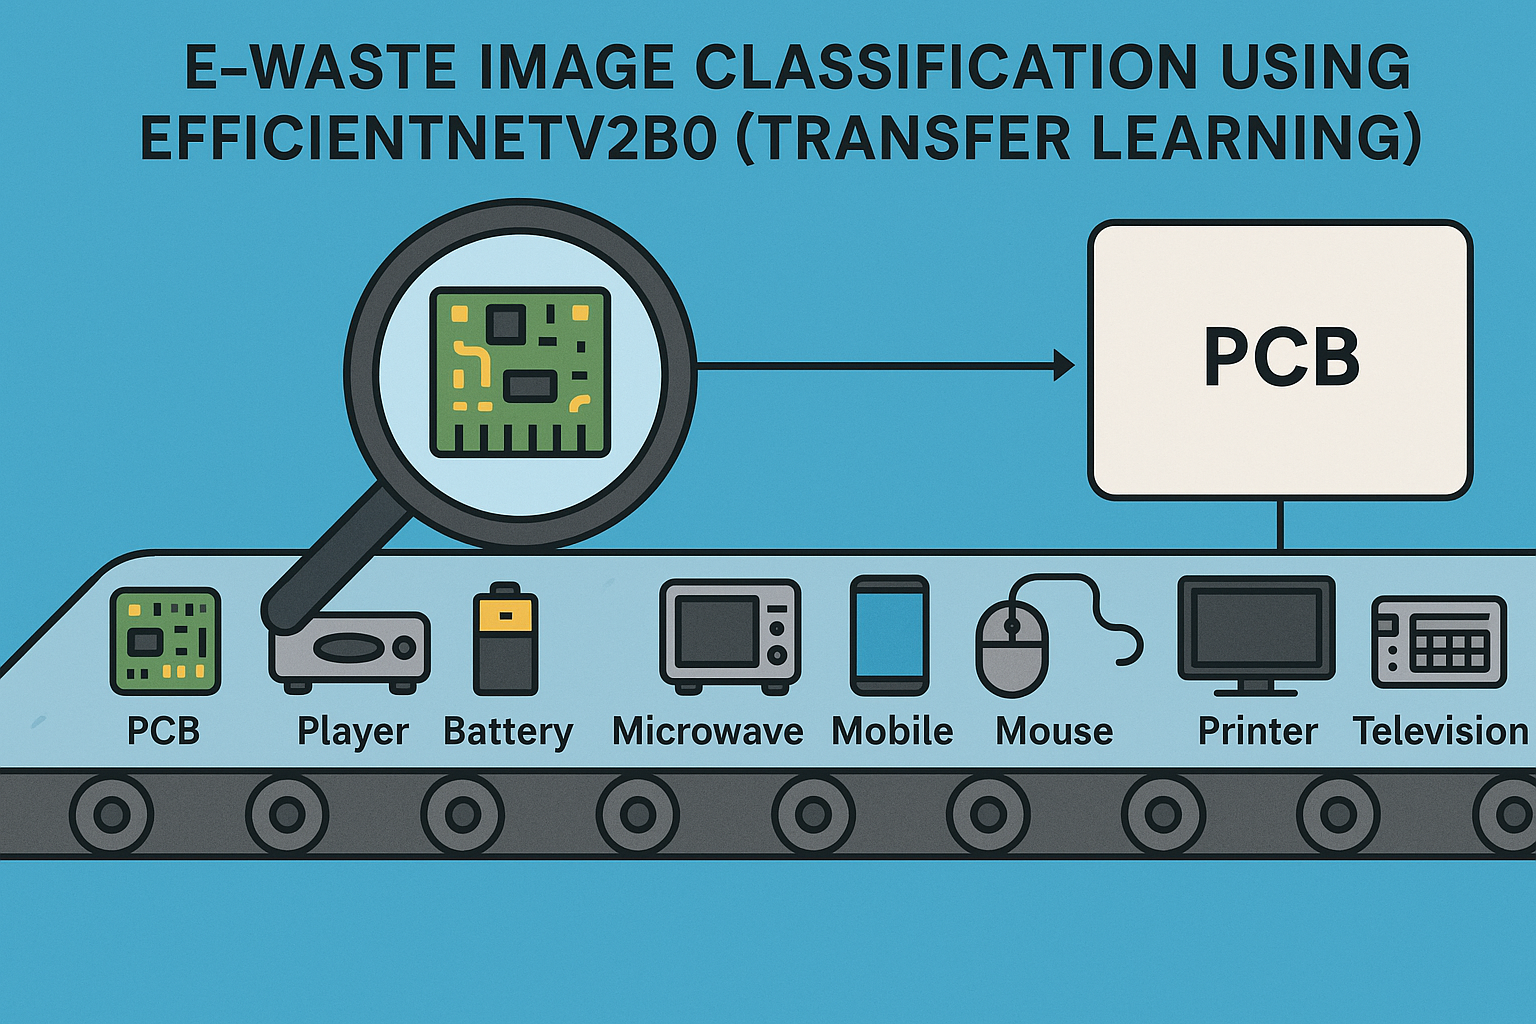



#  E-Waste Image Classification Using EfficientNetV2B0 (Transfer Learning)



##  Problem Statement and Description

E-waste (electronic waste) is rapidly becoming a serious environmental and health issue around the world. Proper sorting and categorization of e-waste is essential for efficient recycling and disposal, but manual classification is error-prone and labor-intensive.

This project aims to build an automated e-waste classification system using artificial intelligence and machine learning. By training a deep learning model on images of different types of e-waste, we can identify and categorize them accurately.

###  Goal:
Use image classification with EfficientNetV2B0 to classify e-waste into 10 distinct categories to support better sorting and recycling automation.

---
</div>




##  Dataset Overview

###  Dataset Name: E-Waste Image Dataset  
###  Source:  https://www.kaggle.com/datasets/akshat103/e-waste-image-dataset 

Each directory contains 10 subfolders, each representing one class of e-waste:

- PCB (Printed Circuit Board)
- Player
- Battery
- Microwave
- Mobile
- Mouse
- Printer
- Television
- Washing Machine
- Keyboard

</div>

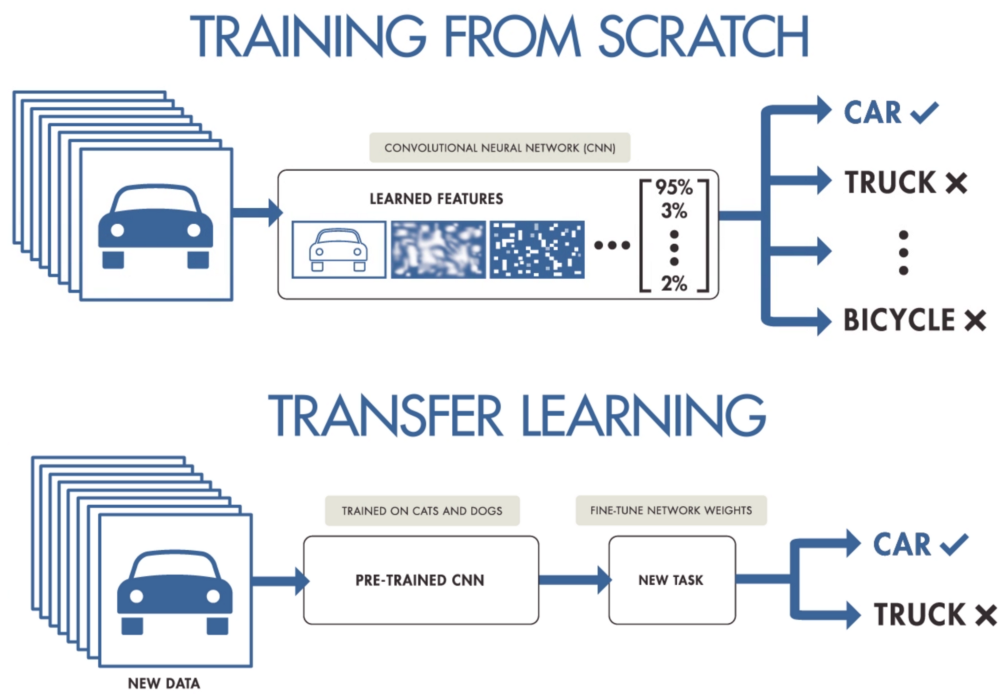




##  What is Transfer Learning?

Transfer Learning: Transfer Learning is a machine learning technique where a pre-trained model developed for a specific task is reused as the starting point for a model on a different but related task. It also allows us to build accurate models in a time-saving way by starting from patterns learned when solving a different problem. This approach is beneficial when there is limited data for the new task, as the pre-trained model already has learned features that can be adapted. Transfer learning can significantly improve models' performance and efficiency in domains like computer vision and natural language processing.

###  Benefits
-  **Reduces training time** — you don't start from scratch.
-  **Leverages learned features** from large datasets (like ImageNet).
-  **Improves performance**, especially with limited data.

---

##  How Does It Work?

1.  Load a pretrained model (e.g., ResNet, EfficientNet).
2.  **Freeze** the pretrained layers (optional).
3.  Add new layers for your custom task.
4.  Train on your new dataset (can also fine-tune).

---

#  EfficientNetV2B0: Transfer Learning Backbone

##  Overview

EfficientNetV2 is an optimized family of models introduced by Google for efficient training and inference.

###  Key Features:
-  Fused MBConv blocks — improve training speed and GPU efficiency.
-  Progressive learning — gradually increases input size during training.
-  Better accuracy with fewer parameters and FLOPs.

---

##  Why Use EfficientNetV2B0?
 -  Lightweight - Small model size, ideal for mobile & edge devices 
 -  Fast - Quick training and inference           
 -  Pretrained on ImageNet - Excellent feature extraction baseline             
 -  High Accuracy - Competitively performs even in low-resource setups



In [ ]:
# Install TensorFlow package
!pip install tensorflow

In [ ]:
Collecting tensorflow
  Downloading tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Collecting absl-py>=1.0.0 (from tensorflow)
  Downloading absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
Collecting astunparse>=1.6.0 (from tensorflow)
  Downloading astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
Collecting flatbuffers>=24.3.25 (from tensorflow)
  Downloading flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
Collecting gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 (from tensorflow)
  Downloading gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
Collecting google-pasta>=0.1.1 (from tensorflow)
  Downloading google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
Collecting libclang>=13.0.0 (from tensorflow)
  Downloading libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
Collecting opt-einsum>=2.3.2 (from tensorflow)
  Downloading opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
Collecting packaging (from tensorflow)
  Downloading packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
Collecting protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3 (from tensorflow)
  Downloading protobuf-5.29.5-cp310-abi3-win_amd64.whl.metadata (592 bytes)
Collecting requests<3,>=2.21.0 (from tensorflow)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
Requirement already satisfied: setuptools in c:\users\lenovo\desktop\e waste project\.venv\lib\site-packages (from tensorflow) (65.5.0)
Collecting six>=1.12.0 (from tensorflow)
  Downloading six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Collecting termcolor>=1.1.0 (from tensorflow)
  Downloading termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
Collecting typing-extensions>=3.6.6 (from tensorflow)
  Using cached typing_extensions-4.14.0-py3-none-any.whl.metadata (3.0 kB)
Collecting wrapt>=1.11.0 (from tensorflow)
  Downloading wrapt-1.17.2-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
Collecting grpcio<2.0,>=1.24.3 (from tensorflow)
  Downloading grpcio-1.73.0-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
Collecting tensorboard~=2.19.0 (from tensorflow)
  Downloading tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
Collecting keras>=3.5.0 (from tensorflow)
  Downloading keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
Collecting numpy<2.2.0,>=1.26.0 (from tensorflow)
  Downloading numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
Collecting h5py>=3.11.0 (from tensorflow)
  Downloading h5py-3.14.0-cp311-cp311-win_amd64.whl.metadata (2.7 kB)
Collecting ml-dtypes<1.0.0,>=0.5.1 (from tensorflow)
  Downloading ml_dtypes-0.5.1-cp311-cp311-win_amd64.whl.metadata (22 kB)
Collecting tensorflow-io-gcs-filesystem>=0.23.1 (from tensorflow)
  Downloading tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
Collecting charset_normalizer<4,>=2 (from requests<3,>=2.21.0->tensorflow)
  Downloading charset_normalizer-3.4.2-cp311-cp311-win_amd64.whl.metadata (36 kB)
Collecting idna<4,>=2.5 (from requests<3,>=2.21.0->tensorflow)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Collecting urllib3<3,>=1.21.1 (from requests<3,>=2.21.0->tensorflow)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
Collecting certifi>=2017.4.17 (from requests<3,>=2.21.0->tensorflow)
  Using cached certifi-2025.6.15-py3-none-any.whl.metadata (2.4 kB)
Collecting markdown>=2.6.8 (from tensorboard~=2.19.0->tensorflow)
  Downloading markdown-3.8.1-py3-none-any.whl.metadata (5.1 kB)
Collecting tensorboard-data-server<0.8.0,>=0.7.0 (from tensorboard~=2.19.0->tensorflow)
  Downloading tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Collecting werkzeug>=1.0.1 (from tensorboard~=2.19.0->tensorflow)
  Downloading werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
Collecting wheel<1.0,>=0.23.0 (from astunparse>=1.6.0->tensorflow)
  Downloading wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
Collecting rich (from keras>=3.5.0->tensorflow)
  Downloading rich-14.0.0-py3-none-any.whl.metadata (18 kB)
Collecting namex (from keras>=3.5.0->tensorflow)
  Downloading namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
Collecting optree (from keras>=3.5.0->tensorflow)
  Downloading optree-0.16.0-cp311-cp311-win_amd64.whl.metadata (31 kB)
Collecting MarkupSafe>=2.1.1 (from werkzeug>=1.0.1->tensorboard~=2.19.0->tensorflow)
  Downloading MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Collecting markdown-it-py>=2.2.0 (from rich->keras>=3.5.0->tensorflow)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
Collecting pygments<3.0.0,>=2.13.0 (from rich->keras>=3.5.0->tensorflow)
  Using cached pygments-2.19.1-py3-none-any.whl.metadata (2.5 kB)
Collecting mdurl~=0.1 (from markdown-it-py>=2.2.0->rich->keras>=3.5.0->tensorflow)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Downloading tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.9/375.9 MB 3.6 MB/s eta 0:00:00
Downloading grpcio-1.73.0-cp311-cp311-win_amd64.whl (4.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 4.0 MB/s eta 0:00:00
Downloading ml_dtypes-0.5.1-cp311-cp311-win_amd64.whl (209 kB)
Downloading numpy-2.1.3-cp311-cp311-win_amd64.whl (12.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 3.6 MB/s eta 0:00:00
Downloading protobuf-5.29.5-cp310-abi3-win_amd64.whl (434 kB)
Using cached requests-2.32.4-py3-none-any.whl (64 kB)
Downloading charset_normalizer-3.4.2-cp311-cp311-win_amd64.whl (105 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Downloading tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.8 MB/s eta 0:00:00
Downloading tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
Downloading absl_py-2.3.0-py3-none-any.whl (135 kB)
Downloading astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Downloading six-1.17.0-py2.py3-none-any.whl (11 kB)
Downloading wheel-0.45.1-py3-none-any.whl (72 kB)
Using cached certifi-2025.6.15-py3-none-any.whl (157 kB)
Downloading flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
Downloading gast-0.6.0-py3-none-any.whl (21 kB)
Downloading google_pasta-0.2.0-py3-none-any.whl (57 kB)
Downloading h5py-3.14.0-cp311-cp311-win_amd64.whl (2.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 4.0 MB/s eta 0:00:00
Downloading keras-3.10.0-py3-none-any.whl (1.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.2 MB/s eta 0:00:00
Downloading libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 3.9 MB/s eta 0:00:00
Downloading markdown-3.8.1-py3-none-any.whl (106 kB)
Downloading opt_einsum-3.4.0-py3-none-any.whl (71 kB)
Downloading tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.7 MB/s eta 0:00:00
Downloading termcolor-3.1.0-py3-none-any.whl (7.7 kB)
Using cached typing_extensions-4.14.0-py3-none-any.whl (43 kB)
Downloading werkzeug-3.1.3-py3-none-any.whl (224 kB)
Downloading MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl (15 kB)
Downloading wrapt-1.17.2-cp311-cp311-win_amd64.whl (38 kB)
Downloading namex-0.1.0-py3-none-any.whl (5.9 kB)
Downloading optree-0.16.0-cp311-cp311-win_amd64.whl (314 kB)
Downloading packaging-25.0-py3-none-any.whl (66 kB)
Downloading MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl (15 kB)
Downloading wrapt-1.17.2-cp311-cp311-win_amd64.whl (38 kB)
Downloading namex-0.1.0-py3-none-any.whl (5.9 kB)
Downloading optree-0.16.0-cp311-cp311-win_amd64.whl (314 kB)
Downloading packaging-25.0-py3-none-any.whl (66 kB)
Downloading wrapt-1.17.2-cp311-cp311-win_amd64.whl (38 kB)
Downloading namex-0.1.0-py3-none-any.whl (5.9 kB)
Downloading optree-0.16.0-cp311-cp311-win_amd64.whl (314 kB)
Downloading packaging-25.0-py3-none-any.whl (66 kB)
Downloading namex-0.1.0-py3-none-any.whl (5.9 kB)
Downloading optree-0.16.0-cp311-cp311-win_amd64.whl (314 kB)
Downloading packaging-25.0-py3-none-any.whl (66 kB)
Downloading optree-0.16.0-cp311-cp311-win_amd64.whl (314 kB)
Downloading packaging-25.0-py3-none-any.whl (66 kB)
Downloading packaging-25.0-py3-none-any.whl (66 kB)
Downloading rich-14.0.0-py3-none-any.whl (243 kB)
Using cached pygments-2.19.1-py3-none-any.whl (1.2 MB)
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
Installing collected packages: namex, libclang, flatbuffers, wrapt, wheel, urllib3, typing-extensions, termcolor, tensorflow-io-gcs-filesystem, tensorboard-data-server, six, pygments, protobuf, packaging, opt-einsum, numpy, mdurl, MarkupSafe, markdown, idna, grpcio, gast, charset_normalizer, certifi, absl-py, werkzeug, requests, optree, ml-dtypes, markdown-it-py, h5py, google-pasta, astunparse, tensorboard, rich, keras, tensorflow
Successfully installed MarkupSafe-3.0.2 absl-py-2.3.0 astunparse-1.6.3 certifi-2025.6.15 charset_normalizer-3.4.2 flatbuffers-25.2.10 gast-0.6.0 google-pasta-0.2.0 grpcio-1.73.0 h5py-3.14.0 idna-3.10 keras-3.10.0 libclang-18.1.1 markdown-3.8.1 markdown-it-py-3.0.0 mdurl-0.1.2 ml-dtypes-0.5.1 namex-0.1.0 numpy-2.1.3 opt-einsum-3.4.0 optree-0.16.0 packaging-25.0 protobuf-5.29.5 pygments-2.19.1 requests-2.32.4 rich-14.0.0 six-1.17.0 tensorboard-2.19.0 tensorboard-data-server-0.7.2 tensorflow-2.19.0 tensorflow-io-gcs-filesystem-0.31.0 termcolor-3.1.0 typing-extensions-4.14.0 urllib3-2.5.0 werkzeug-3.1.3 wheel-0.45.1 wrapt-1.17.2

###  Core Libraries
- `tensorflow`: For deep learning model building and training.
- `numpy`: For numerical operations and array manipulation.
- `matplotlib.pyplot`: For plotting training curves and results.


In [ ]:
import tensorflow as tf  # Core TensorFlow library

from tensorflow.keras import layers, models, optimizers, callbacks  # Layers, model creation, optimizers, and training callbacks

from tensorflow.keras.models import Sequential, load_model  # For sequential model architecture and loading saved models

from tensorflow.keras.applications import EfficientNetV2B0  # Pretrained EfficientNetV2B0 model for transfer learning

from tensorflow.keras.applications.efficientnet import preprocess_input  # Preprocessing function specific to EfficientNet

import numpy as np  # Numerical operations and array handling

import matplotlib.pyplot as plt  # Plotting graphs and images

import seaborn as sns  # Plotting graphs and images

from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics for classification models

import gradio as gr  # Web interface library to deploy and test ML models

from PIL import Image  # For image file loading and basic image operations


###  Format: Folder-based image classification dataset  
- `Train/`: Images used for training the model  
- `Test/`: Images used for model evaluation  
- `Validation/`: Images used to fine-tune and validate the model  


In [ ]:
testpath= r'C:\Users\Lenovo\Desktop\E waste project\E-Waste classification dataset\modified-dataset\test'
trainpath= r'C:\Users\Lenovo\Desktop\E waste project\E-Waste classification dataset\modified-dataset\train'
validpath = r'C:\Users\Lenovo\Desktop\E waste project\E-Waste classification dataset\modified-dataset\val'